![Baseball Flights](baseball_flights.png)


To the Office of Transportation at The 22nd Century Sporting League,

After our inaugural 2101 season, The League is looking for ways to optimize our game scheduling process and costs.  We know that transportation logistics are a major variable to consider during scheduling, and as such, we’ve got a few questions for you. 

Our primary areas of focus are surrounding the number of jets that The League needs to own, and the cost of fuel for those flights. If we want The League to enjoy continued success, we'll need to make sure we manage transportation costs.

We’re sharing schedule data for the upcoming 2102 season.  On each row, you’ll find information about which teams are needing to travel to their next set of games, the time the flight will likely depart (based on our estimations of gameplay durations) and the time the flight will likely land. 

Additionally, we're also providing the fuel price that was paid each day during this past 2101 season. The fuel price fluctuates over time, but we're hoping you'll be able to project it to the future to help with the analysis.

## The Data

### team_flights.csv

| Column     | Description              |
|------------|--------------------------|
| `team_name` | Official team name |
| `departure_datetime` | Date and Time (in UTC) when the flight will depart |
| `landing_datetime` | Date and Time (in UTC) when the flight will land |


### fuel_price.csv

| Column     | Description              |
|------------|--------------------------|
| `date` | Date when the fuel price was recorded |
| `fuel_price` | Corresponding fuel price (in $ per gallon) |


### Important Things to Know
- You can assume that the flight's average speed is 500 MPH. (So, as an example, a 2-hour flight would travel 1000 miles)
- You can assume that each team’s jet fills up with fuel equivalent to 1 gallon per mile-of-travel 
- You can assume that the jet is fueled on the day the travel departs (and thus can use the fuel price corresponding to the departure date)

In [8]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# Explore the data
team_flights = pd.read_csv('./team_flights.csv')
fuel_prices = pd.read_csv('./fuel_prices_2101.csv',
                         index_col='date')

team_flights.head()

# Some basic data cleaning and pre-processing
team_flights['departure_datetime'] = pd.to_datetime(team_flights['departure_datetime'])
team_flights['landing_datetime']   = pd.to_datetime(team_flights['landing_datetime'])

fuel_prices.index = pd.DatetimeIndex(fuel_prices.index).to_period('D')



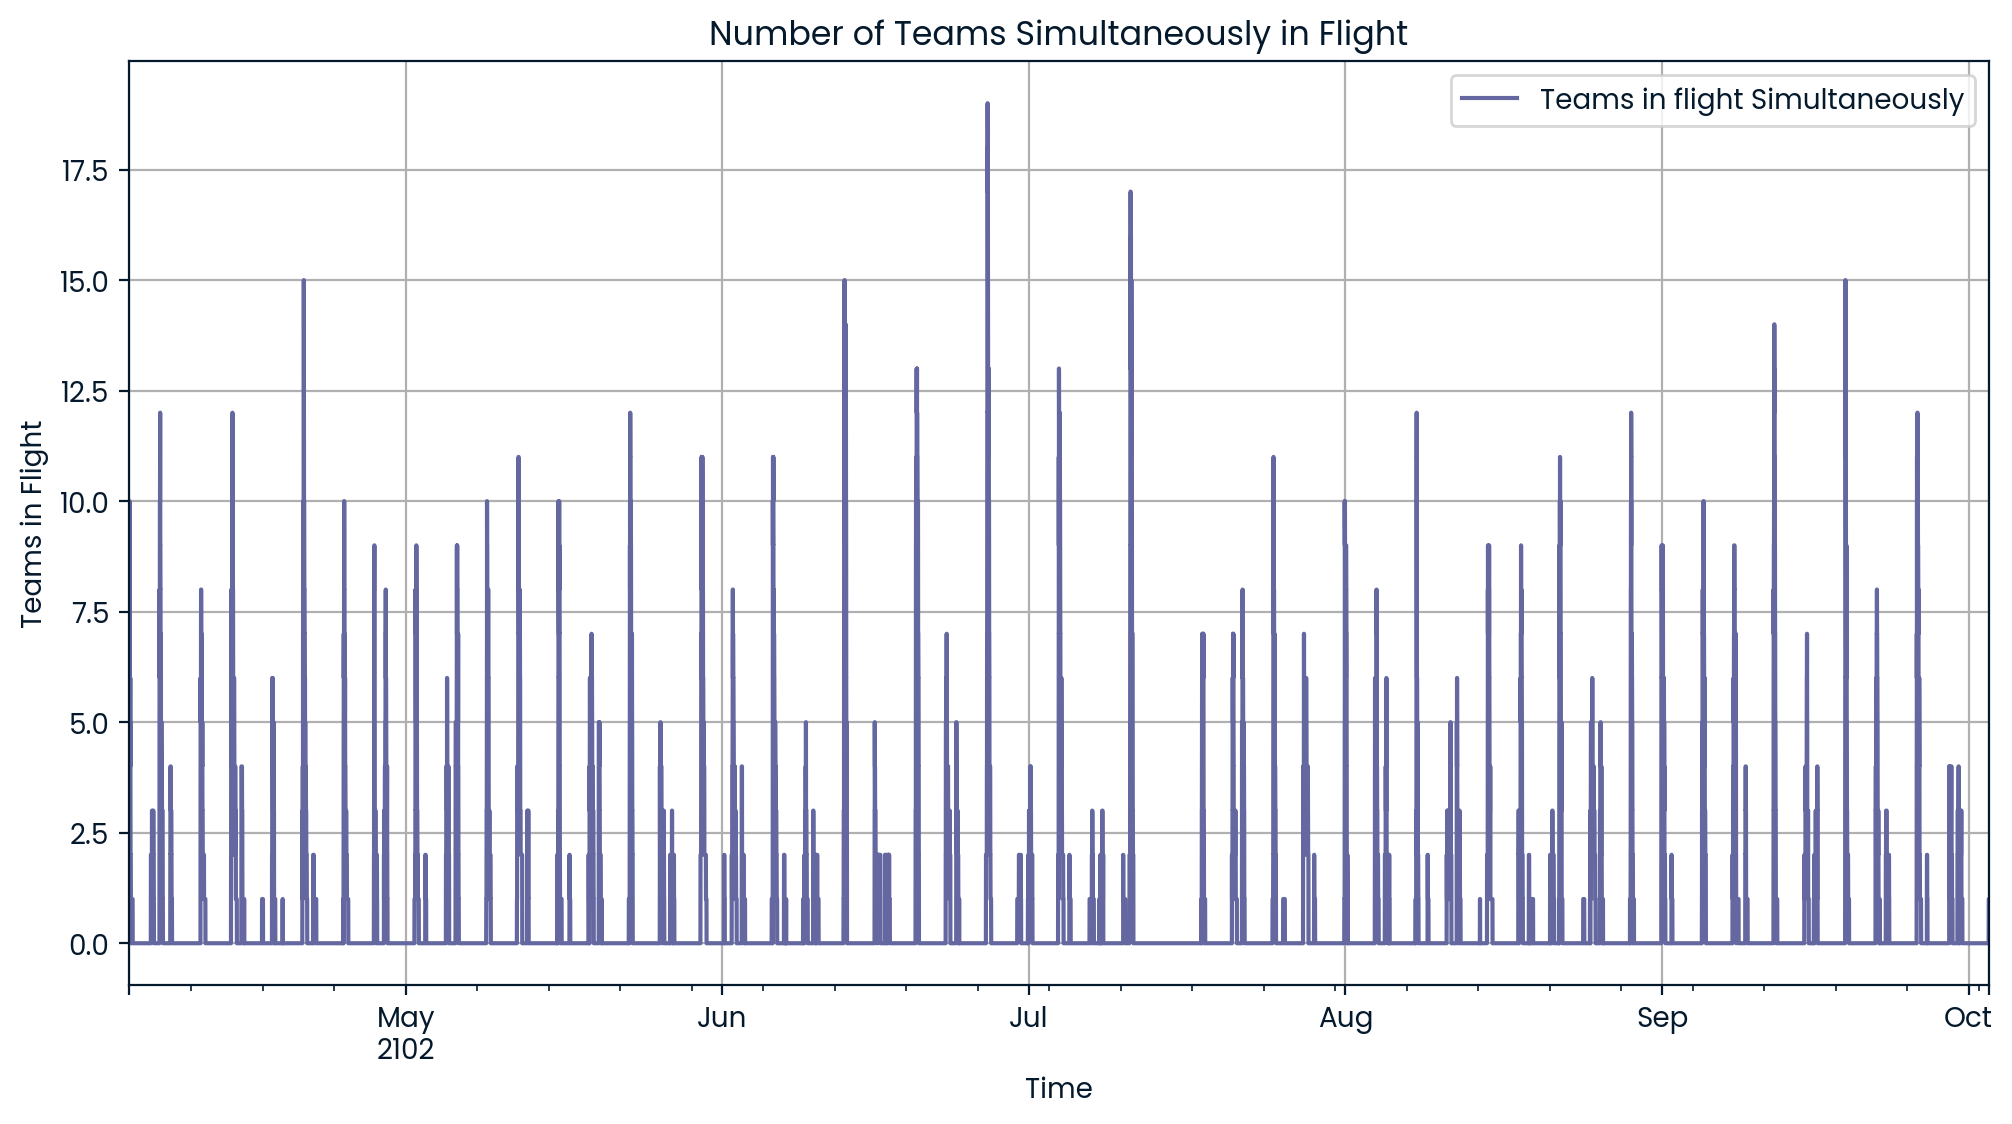

The maximum number of teams in flight in the season 2102 is 19


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppose your DataFrame has 'departure_datetime' and 'landing_datetime' as datetime64
# Create a time range with 1-minute resolution (adjust if needed)
time_index = pd.date_range(start=team_flights["departure_datetime"].min(),
                           end=team_flights["landing_datetime"].max(),
                           freq="1min")

# Initialize a Series to count flights
in_flight_counts = pd.Series(0, index=time_index)

# For each row, increment the counter for time the team is in the air
for _, row in team_flights.iterrows():
    in_flight_counts[row["departure_datetime"]:row["landing_datetime"]] += 1

# Convert to DataFrame for plotting
no_of_inflight_teams_DF = in_flight_counts.to_frame("Teams in flight Simultaneously")

# Plot
no_of_inflight_teams_DF.plot(figsize=(12, 6))
plt.title("Number of Teams Simultaneously in Flight")
plt.xlabel("Time")
plt.ylabel("Teams in Flight")
plt.grid(True)
plt.show()

# Max teams in flight
max_teams_in_flight_find = no_of_inflight_teams_DF["Teams in flight Simultaneously"].max()
max_teams_in_flight = 19
print(f"The maximum number of teams in flight in the season 2102 is {max_teams_in_flight}")




(0.10529145706829932, 0.9664205149823116, 17, 347, {'1%': -3.449336554273722, '5%': -2.8699055166063085, '10%': -2.571226758215748}, -3025.180985658899)
The p-value of the ADFuller test is 0.9664205149823116


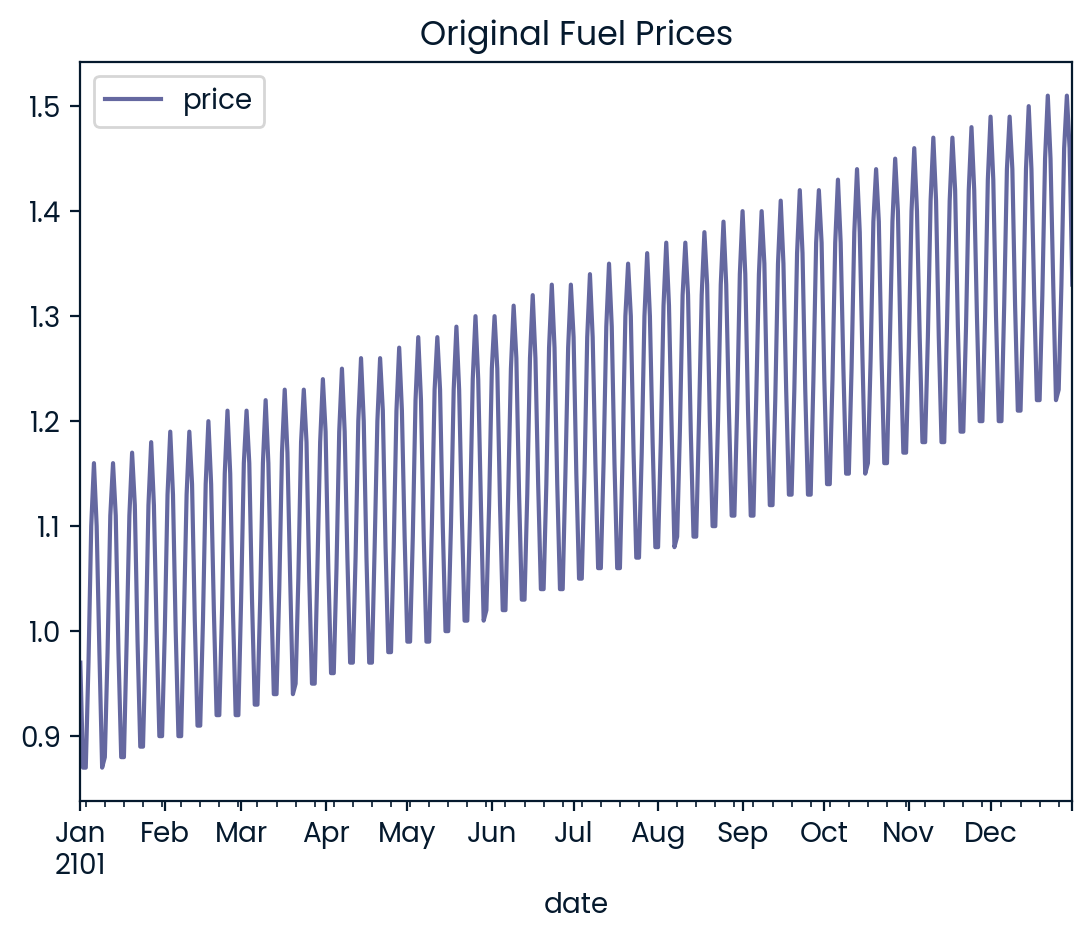

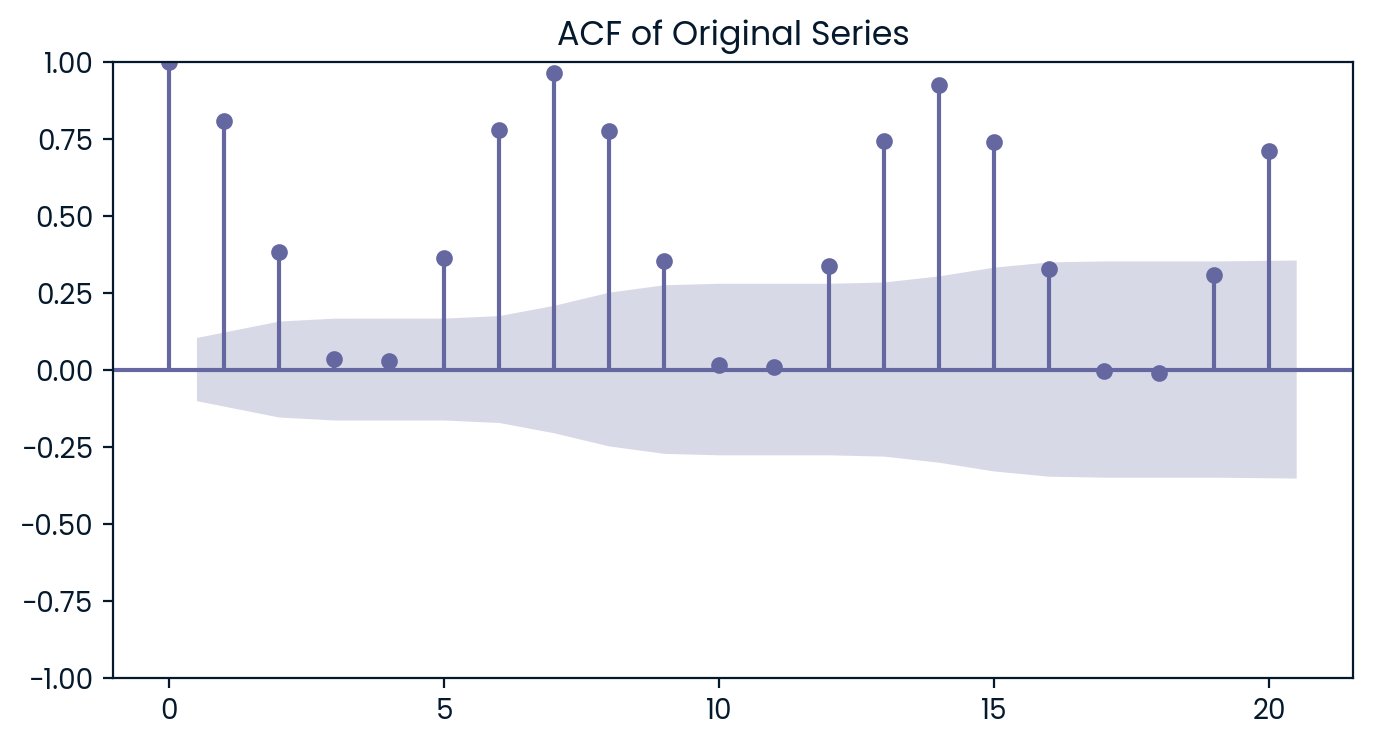

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 357 entries, 2101-01-09 to 2101-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   357 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB
None


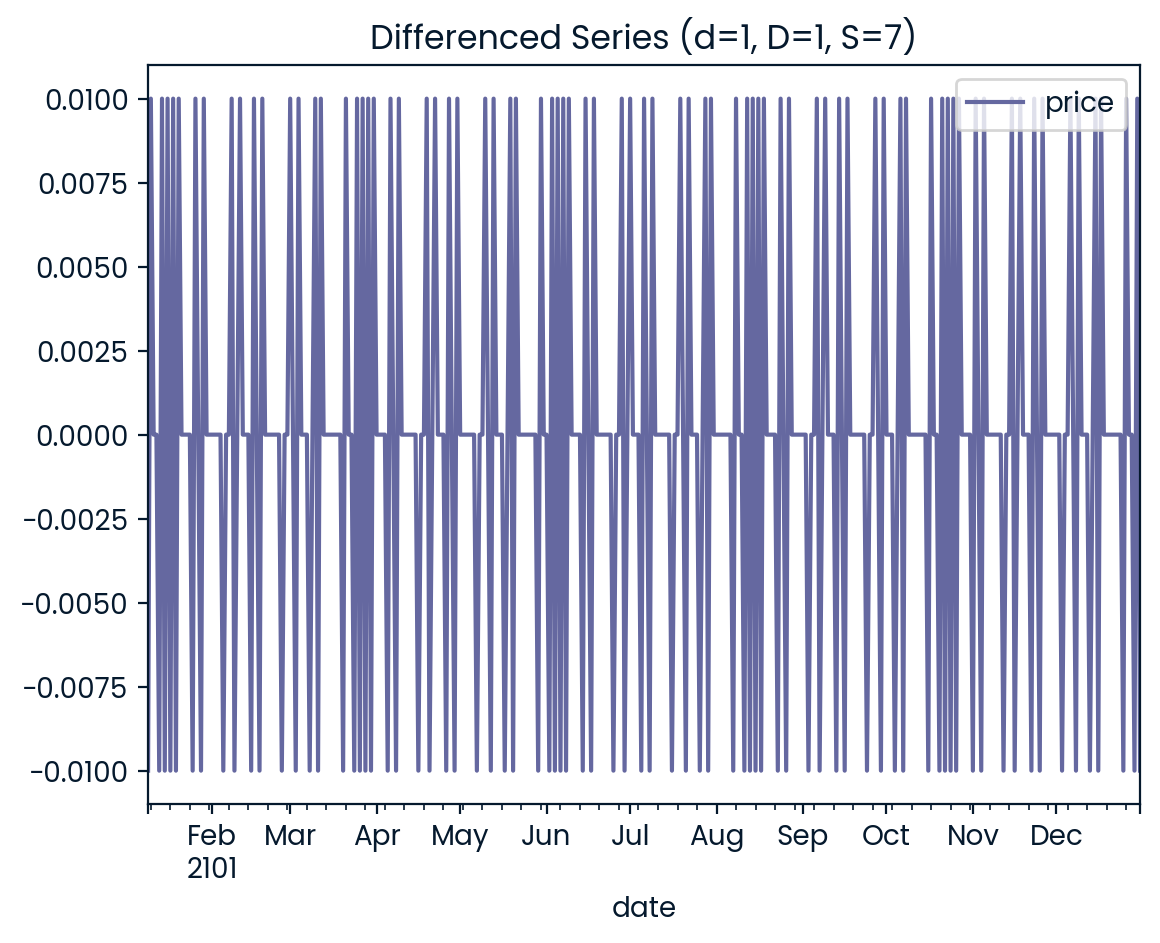

1.1854022605389929e-17
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.09125D+00    |proj g|=  1.33984D+02


 This problem is unconstrained.



At iterate    5    f= -4.34380D+00    |proj g|=  1.99513D-01

At iterate   10    f= -4.34396D+00    |proj g|=  7.10992D+00

At iterate   15    f= -4.37435D+00    |proj g|=  2.12294D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     46      1     0     0   2.123D+00  -4.374D+00
  F =  -4.3743540063243804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<bound method NDFrame.head of             Forecast  Lower CI  Upper CI
2102-01-01  1.230516  1.225248  1.235783
2102-01-02  1.229925  1.224657  1.235193
2102-01-03  1.333071  1.327580  1.338562
2102-01-04  1.463074  1.457476  1.468671
2102-01-05  1.520540  1.514809  1.526270
...              ...       ...       ...
2102-12-27  1.822161  1.609807  2.034515
2102-12-28  1.878264  1.665079  2.091449
2102-12-29  1.822160  1.608148  2.036172
2102-12-30  1.698264  1.483428  1.913100
2102-12-31  1.595273  1.379475  1.811071

[365 rows x 3 columns]>
<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 365 entries, 2102-01-01 to 2102-12-31
Freq: D
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Forecast  365 non-null    float64
 1   Lower CI  365 non-null    float64
 2   Upper CI  365 non-null    float64
dtypes: float64(3)
memory usage: 11.4 KB
None
False


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Preview the DataFrame
#print(fuel_prices.head())
#print(fuel_prices.dtypes)
#print(fuel_prices.info())

# Step 1: Identification using ADF Test
ADF_result = adfuller(fuel_prices.dropna())  # ADF requires no NaNs
print(ADF_result)
print(f"The p-value of the ADFuller test is {ADF_result[1]}")

# Plot to visually inspect trend/seasonality
fuel_prices.plot(title='Original Fuel Prices')
plt.show()

# ACF plot to inspect autocorrelations
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(fuel_prices.dropna(), ax=ax, lags=20)
plt.title('ACF of Original Series')
plt.show()

# Differencing to remove trend and seasonality
# First difference for trend, seasonal difference for weekly seasonality
fuel_prices_diff = fuel_prices.diff(1).diff(7).dropna()
print(fuel_prices_diff.info())

# Optional: Plot differenced data to confirm stationarity
fuel_prices_diff.plot(title='Differenced Series (d=1, D=1, S=7)')
plt.show()
ADF_diff_result = adfuller(fuel_prices_diff)
print(ADF_diff_result[1])

#Since my p-value < 0.05 and the plot shows stationarity, we can confirm that the data is now stationary.

#Automation: Looping over the different orders to find the best one. Since this is a predictive model, we will use AIC as the standard for comparison. 

#import pmdarima as pm
#auto_result = pm.auto_arima(fuel_prices_diff, start_p = 0, start_q = 0, max_p = 3, max_q = 3, seasonal = True, m = 7, start_P = 0, start_Q = 0, max_P = 3, max_Q = 3, information_criterion = 'aic', error_action = 'ignore')
#print(auto_result)

#Modelling time!! Sarimax (1,0,1) (3,0,0)7
model = SARIMAX(fuel_prices, order = (1,1,1), seasonal_order = (3,1,0,7))
results = model.fit()
forecast = results.get_prediction(start="2102-01-01", end="2102-12-31")
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()
forecast_index = predicted_mean.index

#Convert to DataFrame
forecast_df = pd.DataFrame({
    'Forecast': predicted_mean.values,
    'Lower CI': conf_int.iloc[:, 0].values,
    'Upper CI': conf_int.iloc[:, 1].values
}, index=forecast_index)
print(forecast_df.head)
print(forecast_df.info())

#Check if the index of the inflight and the fuelpirces df is the same
print(forecast_df.index.equals(no_of_inflight_teams_DF.index))

In [11]:
import pandas as pd
import numpy as np

# Merging both dataframes
team_flights = pd.read_csv('./team_flights.csv')
team_flights['departure_datetime'] = pd.to_datetime(team_flights['departure_datetime'])
team_flights['landing_datetime'] = pd.to_datetime(team_flights['landing_datetime'])

# Convert the index to datetime if it's not already
# forecast_df.index = forecast_df.index.to_timestamp()
# team_flights.index = pd.to_datetime(team_flights.index)

# Extract the date from the datetime index
forecast_df['Date'] = forecast_df.index.to_timestamp().date
team_flights['Date'] = team_flights['departure_datetime'].dt.date

merged_df = pd.merge(forecast_df, team_flights, on=['Date', 'Date'], how='inner')
merged_df["travel_cost"] = merged_df['travel_distance_miles'] * merged_df['Forecast']
total_fuel_spend_2102_dollars = np.sum(merged_df["travel_cost"])

print(max_teams_in_flight)
print(total_fuel_spend_2102_dollars)

19
1868126.3743729808


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.09125D+00    |proj g|=  1.33984D+02


 This problem is unconstrained.



At iterate    5    f= -4.34380D+00    |proj g|=  1.99513D-01

At iterate   10    f= -4.34396D+00    |proj g|=  7.10992D+00

At iterate   15    f= -4.37435D+00    |proj g|=  2.12294D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     46      1     0     0   2.123D+00  -4.374D+00
  F =  -4.3743540063243804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


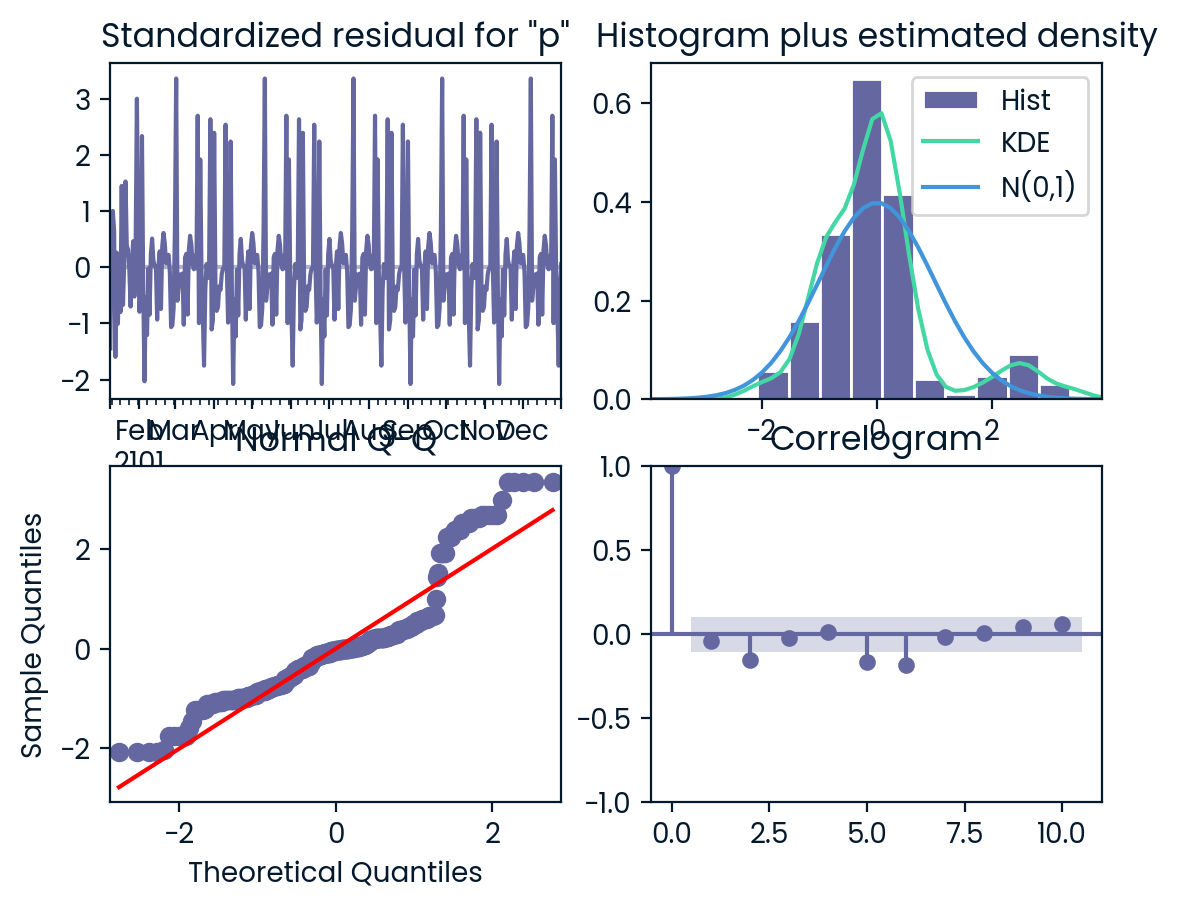

                                     SARIMAX Results                                      
Dep. Variable:                              price   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(3, 1, [], 7)   Log Likelihood                1596.639
Date:                            Thu, 07 Aug 2025   AIC                          -3181.278
Time:                                    19:12:16   BIC                          -3158.012
Sample:                                01-01-2101   HQIC                         -3172.024
                                     - 12-31-2101                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2954      0.062     -4.768      0.000      -0.417      -0.174
ma.L1         -0.7065      0.066   

In [16]:
#Model Diagnostics
model = SARIMAX(fuel_prices, order = (1,1,1), seasonal_order = (3,1,0,7))
results = model.fit()
results.plot_diagnostics()
plt.show()

print(results.summary())